# Enron Sentiment Analysis: 90s Partition

In [22]:
import pandas as pd

# Importing data
main = pd.read_csv('../../data/processed_emails.csv',index_col=False)
main.replace(to_replace='NaN', value=None, inplace=True)
main.drop(['message', 'file'], axis = 1, inplace=True)

# Turning date strings int datetime objects
main['date'] = pd.to_datetime(main['date'])

main.head()

/var/folders/xc/qgn4x7m553q861_qsrx3p1gr0000gn/T/ipykernel_69670/2735748863.py:9: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  main['date'] = pd.to_datetime(main['date'])


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
0,Here is our forecast,phillip.allen@enron.com,tim.belden@enron.com,NaN,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-14 16:39:00-07:00
1,Traveling to have a business meeting takes the...,phillip.allen@enron.com,john.lavorato@enron.com,NaN,NaN,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-04 13:51:00-07:00
2,test successful. way to go!!!,phillip.allen@enron.com,leah.arsdall@enron.com,NaN,NaN,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-18 03:00:00-07:00
3,"Randy, Can you send me a schedule of the salar...",phillip.allen@enron.com,randall.gay@enron.com,NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-23 06:13:00-07:00
4,Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,greg.piper@enron.com,NaN,NaN,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-31 05:07:00-07:00


In [35]:
data_90s = main[main['date'] < pd.to_datetime('2000-01-01 00:00:00-07:00')]
data_90s.head()

,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
275,---------------------- Forwarded by Phillip K ...,phillip.allen@enron.com,pallen70@hotmail.com,NaN,NaN,Stick it in your Shockmachine!,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,1999-12-11 06:39:00-08:00
276,"Naomi,The two analysts that I have had contact...",phillip.allen@enron.com,naomi.johnston@enron.com,NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,1999-12-10 07:00:00-08:00
664,How is your racing going? What category are y...,phillip.allen@enron.com,muller@thedoghousemail.com,NaN,NaN,Re: (No Subject),\Phillip_Allen_Dec2000\Notes Folders\All docum...,1979-12-31 16:00:00-08:00
698,EOL report for TV in conference on 33Cash -Heh...,phillip.allen@enron.com,"stephen.harrington@enron.com, mary@enron.com",NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\All docum...,1979-12-31 16:00:00-08:00
715,"Jeff, I want to bid $2.8 for sagewood with a r...",phillip.allen@enron.com,jsmith@austintx.com,NaN,NaN,Re: MISSION SOUTH,\Phillip_Allen_Dec2000\Notes Folders\All docum...,1979-12-31 16:00:00-08:00


### Network Analysis

In [56]:
#For 1999
data_99 = data_90s[data_90s['date'] >= pd.to_datetime('1999-01-01 00:00:00-7:00')]
grouped_df = data_90s.groupby(['sender', 'recipient1']).size().reset_index(name='count')

grouped_df.head()



,sender,recipient1,count
0,accthelp@cooltravelassistant.com,mark.taylor@enron.com,2
1,af@tfts.tozzini.com.br,sara.shackleton@enron.com,2
2,af@tozzini.com.br,sara.shackleton@enron.com,2
3,aimee.lannou@enron.com,daren.farmer@enron.com,3
4,alan.aronowitz@enron.com,dan.hyvl@enron.com,1


In [57]:
executives = ["jeff.skilling@enron.com", "kenneth.lay@enron.com", "andrew.fastow@enron.com","rebecca.mark@enron.com","arthur.andersen@enron.com","lou.pai@enron.com"]


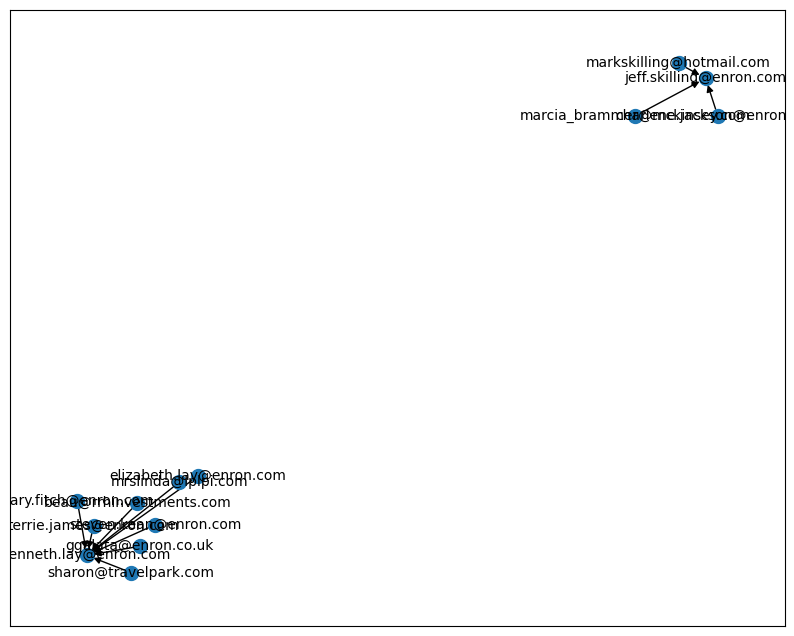

In [75]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()

potential_participants = []
for index, row in grouped_df.iterrows():
    if row['sender'] in executives or row['recipient1'] in executives:
        if row['sender'] in executives:
            potential_participants.append(row['recipient1'])
        else:
            potential_participants.append(row['sender'])
        G.add_edge(row['sender'], row['recipient1'], weight=row['count'])
plt.figure(figsize=(10, 8))
nx.draw_networkx(G, with_labels=True,node_size=100, font_size=10)
plt.show()


In [73]:
print(potential_participants)
sus_df = data_90s[data_90s['sender'].isin(potential_participants) | data_90s['recipient1'].isin(potential_participants)]
sus_df

['beau@rrhinvestments.com', 'charlene.jackson@enron.com', 'elizabeth.lay@enron.com', 'gary.fitch@enron.com', 'ggalata@enron.co.uk', 'marcia_brammer@mckinsey.com', 'markskilling@hotmail.com', 'mrslinda@lplpi.com', 'sharon@travelpark.com', 'steven.kean@enron.com', 'terrie.james@enron.com']


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
64619,X-Folder: \Jeff_Dasovich_Dec2000\Notes Folders...,steven.kean@enron.com,"paul.kaufman@enron.com, susan.mara@enron.com, ...",Bcc: richard.shapiro@enron.com,X-From: Steven J Kean,"\tmona.petrochko@enron.com, sandra.mccubbin@en...","X-To: Paul Kaufman, Susan J Mara, Jeff Dasovic...",1999-10-06 06:44:00-07:00
83583,X-Folder: \Jeff_Dasovich_Dec2000\Notes Folders...,steven.kean@enron.com,"paul.kaufman@enron.com, susan.mara@enron.com, ...",Bcc: richard.shapiro@enron.com,X-From: Steven J Kean,"\tmona.petrochko@enron.com, sandra.mccubbin@en...","X-To: Paul Kaufman, Susan J Mara, Jeff Dasovic...",1999-10-06 06:44:00-07:00
183112,"X-Origin: JONES-TX-FileName: tjones.nsfSteve, ...",tana.jones@enron.com,steven.kean@enron.com,X-From: Tana Jones,X-To: Steven J Kean,Re: EnronOnline Market Descriptions,X-cc: Jeffrey T Hodge,1999-09-03 09:03:00-07:00
196871,"X-Origin: JONES-TX-FileName: tjones.nsfSteve, ...",tana.jones@enron.com,steven.kean@enron.com,X-From: Tana Jones,X-To: Steven J Kean,Re: EnronOnline Market Descriptions,X-cc: Jeffrey T Hodge,1999-09-03 09:03:00-07:00
227429,Per Geoff Roberts,steven.kean@enron.com,Subject: PGE/Commercial Support Group Meeting...,X-bcc:,X-Folder: \Steven_Kean_Dec2000_1\Notes Folders...,Mime-Version: 1.0,X-Origin: KEAN-S,1997-03-03 03:00:00-08:00
...,...,...,...,...,...,...,...,...
446195,"Mark, I have a letter here that Jeff would lik...",sherri.reinartz@enron.com,markskilling@hotmail.com,NaN,NaN,Re:,\Jeffrey_Skilling_Dec2000\Notes Folders\Sent,1999-02-16 06:39:00-08:00
446244,"Happy to hear you are ok, Mark. Do you need a...",sherri.reinartz@enron.com,markskilling@hotmail.com,NaN,NaN,Re: earthquake---are you all right?,\Jeffrey_Skilling_Dec2000\Notes Folders\Sent,1999-08-16 17:18:00-07:00
446255,"Mark,I got your nice letter - hope things are ...",sherri.reinartz@enron.com,markskilling@hotmail.com,NaN,NaN,NaN,\Jeffrey_Skilling_Dec2000\Notes Folders\Sent,1999-09-17 03:45:00-07:00
475813,"X-To: Steven J KeanX-cc: Mark E Haedicke, Mark...",jeffrey.keeler@enron.com,steven.kean@enron.com,Content-Transfer-Encoding: 7bit,"Bcc: mark.haedicke@enron.com, mark.taylor@enro...",Final Version - Talking Points for Ken Lay - L...,"\tcynthia.sandherr@enron.com, joe.hillings@enr...",1999-07-23 09:19:00-07:00


In [70]:
sus_df['text'][445889]

"X-Origin: SKILLING-JX-FileName: jskillin.nsfI'm in one piece; oblivious (if not for the news) of the bombs going offall around me.  There's close to 15 million people here, so it shouldtake a while for them to get to me if they go at 13 people increments.Inappropriate joking aside, what an awful thing.  I wonder at thestrange sort of logic that compels the bastards.  I hope they met asgrisly an end as the ones their handing out.Did you get my picture?  Looking forward to the basket of goodies.  Ihave a mailbox now, so letters should be more secure.Thanks for the note.  Hope all is well.Mark-O>From: TOMSKILLJR@aol.com>To: markskilling@hotmail.com>Subject: explosion attack>Date: Sat, 13 Mar 1999 23:37:56 EST>>Dear Mark ;   We saw a bad explosion on WGN-Tv in Istanbul just a fewminutes>ago.  Please assure your safety.  I mailed a large envelope of goodiesto you>last Wednesday.  Love from both of us.  Mother and Dad.Get Your Private, Free Email at http://www.hotmail.com"

In [76]:
import sentiment_funcs as sf

# Parititioning data into groups of 1000
chunks_90s = uf.chunk_dataframe(sus_df, chunk_size=100)

In [77]:
#Sentiment classification
processed_chunks = []
for i, item in enumerate(chunks_90s):
    print(f"\nProcessing Chunk {i + 1}/{len(chunks_90s)}\n")
    df = sf.classify_text_batch(item['text'])
    processed_chunks.append(df)


Processing Chunk 1/9


Processing Chunk 2/9


Processing Chunk 3/9


Processing Chunk 4/9


Processing Chunk 5/9


Processing Chunk 6/9


Processing Chunk 7/9


Processing Chunk 8/9


Processing Chunk 9/9



In [78]:
data_90s = pd.concat(processed_chunks, ignore_index=True)
data_90s

,text,embeddings,label
0,X-Folder: \Jeff_Dasovich_Dec2000\Notes Folders...,"[-0.053374093025922775, -0.0565754771232605, 0...",neutral
1,X-Folder: \Jeff_Dasovich_Dec2000\Notes Folders...,"[-0.04948565363883972, -0.055881042033433914, ...",neutral
2,"X-Origin: JONES-TX-FileName: tjones.nsfSteve, ...","[-0.08461281657218933, 0.08048088848590851, -0...",neutral
3,"X-Origin: JONES-TX-FileName: tjones.nsfSteve, ...","[-0.08461281657218933, 0.08048088848590851, -0...",neutral
4,Per Geoff Roberts,"[0.048576436936855316, 0.031071152538061142, -...",neutral
...,...,...,...
859,"Mark, I have a letter here that Jeff would lik...","[-0.013745233416557312, -0.03020964004099369, ...",neutral
860,"Happy to hear you are ok, Mark. Do you need a...","[-0.04569626599550247, -0.02535329759120941, 0...",positive
861,"Mark,I got your nice letter - hope things are ...","[-0.023875096812844276, -0.0843149945139885, 0...",positive
862,"X-To: Steven J KeanX-cc: Mark E Haedicke, Mark...","[-0.11330448091030121, -0.04899350926280022, 0...",neutral


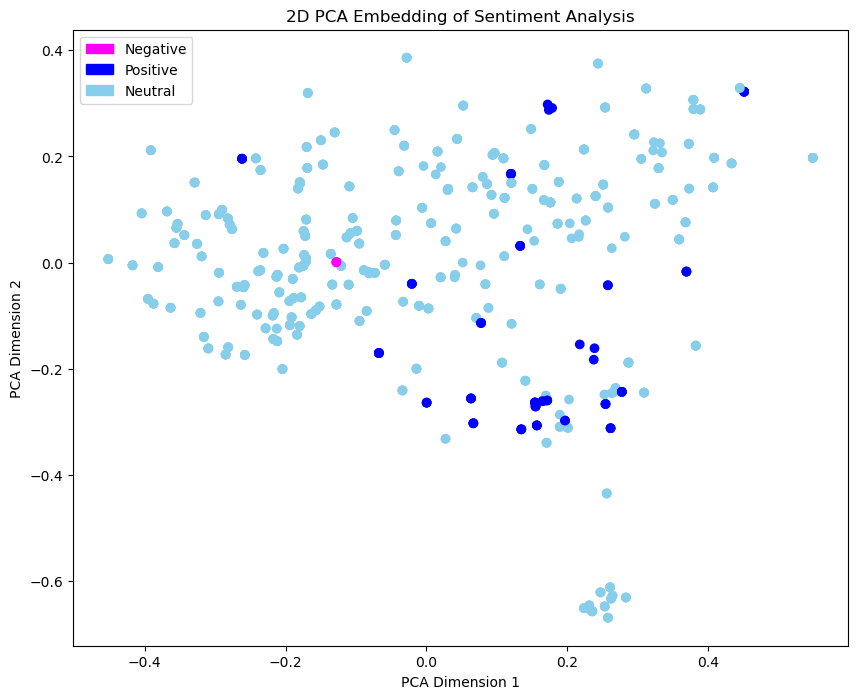

In [84]:

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(data_90s['embeddings'].tolist())


labels = data_90s['label'].tolist()
colors = ['magenta' if label == 'negative' else 'blue' if label == 'positive' else '#87CEEB' for label in labels]

#Create Scatter Plot
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)


negative_patch = mpatches.Patch(color='magenta', label='Negative')
positive_patch = mpatches.Patch(color='blue', label='Positive')
neutral_patch = mpatches.Patch(color='#87CEEB', label='Neutral')

plt.legend(handles=[negative_patch, positive_patch, neutral_patch])
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('2D PCA Embedding of Sentiment Analysis')
plt.show()

In [30]:
plt.savefig('../../figures/sentiment_p1.png')

<Figure size 640x480 with 0 Axes>

### Printing  Messages

In [87]:
negative_msgs = data_90s[data_90s['label'] == 'negative']
neutral_msgs = data_90s[data_90s['label'] == 'neutral']

def print_emails (df):
    for _, row in df.iterrows():
        print(f"\n{_}: {row['text']}\n")

In [88]:
# Negative Emails
print_emails(negative_msgs)


684: X-Origin: LAY-KX-FileName: klay.nsfI just got off the phone with Daniel at the Ritz  and I am a little upset because it turns out the entire hotel is booked up until the 26th (Friday) before the wedding. We are going to have a number of people who will want to come in at least Thursday or Wednesday before the wedding and others who will want to come in an entire week before and will not want to switch hotels. Therefore, I'm not sure it is going to work. Further, they are requiring the three night stay beginning on Friday and we have a number of Argentines who will want to leave on Sunday but will be charged for Sunday night. Sooo, we are back at square one and trying to find another place for everything. I don't want to cancel the Ritz just yet, but if we can book rooms for the week before the wedding and the weekend of the wedding at the Four Season and if you can suggest a really great place to have the reception, that may be what we have to do.  Can you please advise me on you

In [90]:
#Neutral Emails
print_emails(neutral_msgs)


0: X-Folder: \Jeff_Dasovich_Dec2000\Notes Folders\All documentsX-Origin: DASOVICH-JX-FileName: jdasovic.nsfHeads up.  This is not to be discussed in advance out side of Enron, but you guys need to know.  If there are ways we can be helpful, call Carolyn Green to discuss.---------------------- Forwarded by Steven J Kean/HOU/EES on 10/06/99 01:39 PM ---------------------------Mark Palmer@ENRON10/06/99 11:18 AMTo: Steven J Kean/HOU/EES@EEScc:  Subject: Madera Ranch Press ReleaseThis will touch off a firestorm.  Diane is doing a good job, retaining McNally Temple in CA and even getting some message development help from our old friends at Public Strategies in Austin.  I'll stay on top of it.---------------------- Forwarded by Mark Palmer/Corp/Enron on 10/06/99 11:03 AM ---------------------------Diane Bazelides@AZURIX10/05/99 04:23 PMTo: Rebecca P Mark/HOU/AZURIX@AZURIX, John Ale/HOU/AZURIX@AZURIX, Neil D Meyer/HOU/AZURIX@AZURIX, Rodney Faldyn/HOU/AZURIX@AZURIX, Rodney L Gray/HOU/AZURIX@A